In [ ]:
# ================================================================ASSIGNMENT_19=========================================================================

In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sdsum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdsum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv("19. amazonreviews.tsv", sep="\t")

In [ ]:
# Data Cleaning: Remove duplicates, handle missing reviews if any, preprocess text (lowercasing, stopwords removal).

In [4]:
print("Original Data:")
print(df.head())

Original Data:
  label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...


In [6]:
# 1. Remove duplicates
df = df.drop_duplicates(subset='review')
print(f"\nData after removing duplicates: {df.shape[0]} rows")


Data after removing duplicates: 10000 rows


In [8]:
df = df.dropna(subset=['review'])

In [9]:
print(f"Data after handling missing values: {df.shape[0]} rows")

Data after handling missing values: 10000 rows


In [10]:
stop_words = set(stopwords.words('english'))

In [11]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [13]:
df['Cleaned_Review'] = df['review'].apply(preprocess_text)

In [15]:
print("\nSample cleaned reviews:")
print(df[['review', 'Cleaned_Review']].head())


Sample cleaned reviews:
                                              review  \
0  Stuning even for the non-gamer: This sound tra...   
1  The best soundtrack ever to anything.: I'm rea...   
2  Amazing!: This soundtrack is my favorite music...   
3  Excellent Soundtrack: I truly like this soundt...   
4  Remember, Pull Your Jaw Off The Floor After He...   

                                      Cleaned_Review  
0  stuning even nongamer sound track beautiful pa...  
1  best soundtrack ever anything im reading lot r...  
2  amazing soundtrack favorite music time hands i...  
3  excellent soundtrack truly like soundtrack enj...  
4  remember pull jaw floor hearing youve played g...  


In [16]:
df.to_csv("cleaned_reviews.tsv", sep='\t', index=False)

In [ ]:
# Exploratory Analysis: Word clouds, sentiment distribution, most common positive/negative words.

In [27]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.6 MB/s eta 0:00:00


In [28]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdsum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

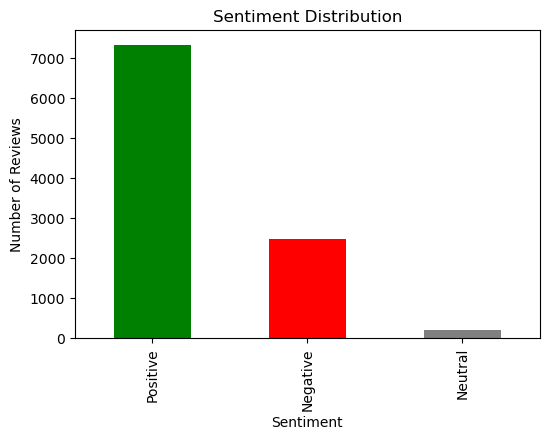

In [29]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['Cleaned_Review'].apply(get_sentiment)

def label_sentiment(p):
    if p > 0:
        return 'Positive'
    elif p < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Polarity'].apply(label_sentiment)

plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.ylabel("Number of Reviews")
plt.show()

In [30]:
stop_words = set(stopwords.words('english'))

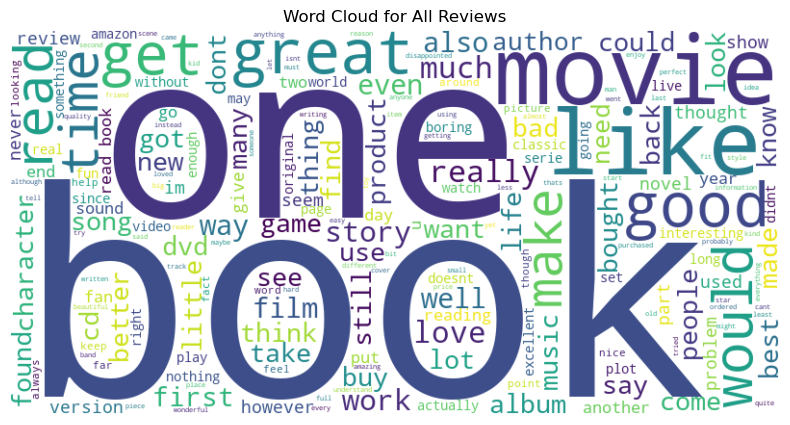

In [31]:
all_text = ' '.join(df['Cleaned_Review'])
wordcloud_all = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Reviews")
plt.show()

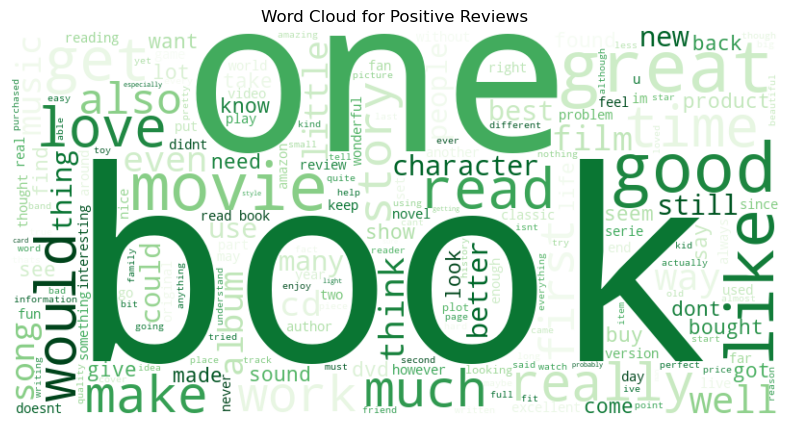

In [32]:
# Word cloud for positive reviews
positive_text = ' '.join(df[df['Sentiment']=='Positive']['Cleaned_Review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, colormap='Greens').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

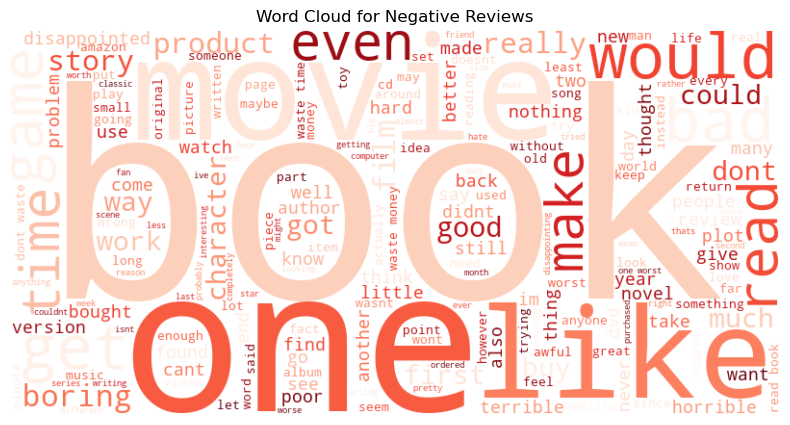

In [33]:
# Word cloud for negative reviews
negative_text = ' '.join(df[df['Sentiment']=='Negative']['Cleaned_Review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words, colormap='Reds').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()

In [34]:
# Most Common Words
def get_most_common_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    counter = Counter(all_words)
    return counter.most_common(n)

print("Top 20 Words in Positive Reviews:")
print(get_most_common_words(df[df['Sentiment']=='Positive']['Cleaned_Review']))

print("\nTop 20 Words in Negative Reviews:")
print(get_most_common_words(df[df['Sentiment']=='Negative']['Cleaned_Review']))

Top 20 Words in Positive Reviews:
[('book', 4939), ('one', 2858), ('great', 2591), ('good', 2471), ('read', 2097), ('like', 2091), ('movie', 1717), ('would', 1711), ('get', 1374), ('time', 1341), ('really', 1253), ('dont', 1151), ('first', 1135), ('much', 1127), ('well', 1123), ('love', 1095), ('best', 1043), ('story', 1015), ('even', 936), ('better', 921)]

Top 20 Words in Negative Reviews:
[('book', 1486), ('one', 954), ('movie', 811), ('like', 700), ('would', 637), ('read', 622), ('dont', 585), ('bad', 578), ('time', 539), ('get', 524), ('even', 449), ('game', 377), ('ever', 373), ('money', 361), ('boring', 356), ('worst', 354), ('really', 346), ('buy', 339), ('waste', 327), ('could', 320)]


In [ ]:
# Model Development: Use NLP techniques (TF-IDF, Word2Vec, or BERT embeddings) with models like Logistic Regression, SVM, or Neural Networks.

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
X = df['Cleaned_Review']
y = df['Sentiment']  

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [40]:
# ----- Logistic Regression -----
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

In [41]:
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

    Negative       0.93      0.61      0.74       508
     Neutral       0.75      0.08      0.14        38
    Positive       0.86      0.98      0.92      1454

    accuracy                           0.87      2000
   macro avg       0.85      0.56      0.60      2000
weighted avg       0.88      0.87      0.86      2000

Confusion Matrix:
 [[ 312    0  196]
 [   2    3   33]
 [  21    1 1432]]


In [42]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

In [43]:
print("\nSVM Results:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Results:
              precision    recall  f1-score   support

    Negative       0.85      0.67      0.75       508
     Neutral       0.50      0.08      0.14        38
    Positive       0.88      0.96      0.92      1454

    accuracy                           0.87      2000
   macro avg       0.74      0.57      0.60      2000
weighted avg       0.86      0.87      0.86      2000

Confusion Matrix:
 [[ 338    0  170]
 [  11    3   24]
 [  48    3 1403]]


In [60]:
# Word2Vec

import gensim
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [45]:
sentences = [review.split() for review in df['Cleaned_Review']]

In [46]:
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [47]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Cleaned_Review'])
X_seq = tokenizer.texts_to_sequences(df['Cleaned_Review'])
X_pad = pad_sequences(X_seq, maxlen=100)

In [48]:
le = LabelEncoder()
y_enc = le.fit_transform(df['Sentiment'])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_enc, test_size=0.2, random_state=42)

In [50]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) 

C:\Users\sdsum\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [52]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 117ms/step - accuracy: 0.7319 - loss: 0.6812 - val_accuracy: 0.7270 - val_loss: 0.6117
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.7836 - loss: 0.4996 - val_accuracy: 0.8415 - val_loss: 0.4242
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 99ms/step - accuracy: 0.8989 - loss: 0.2837 - val_accuracy: 0.8725 - val_loss: 0.3332
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.9416 - loss: 0.1727 - val_accuracy: 0.8560 - val_loss: 0.3448
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9626 - loss: 0.1131 - val_accuracy: 0.8820 - val_loss: 0.3205


In [54]:
loss, acc = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8820 - loss: 0.3205
Neural Network Accuracy: 0.8820000290870667


In [ ]:
# Validation: Use train/test split, cross-validation, and metrics like accuracy, F1-score.

In [55]:
X = df['Cleaned_Review']
y = df['Sentiment']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [58]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

In [61]:
print("---- Logistic Regression ----")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

---- Logistic Regression ----
Accuracy: 0.8605

Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.57      0.70       494
     Neutral       1.00      0.02      0.05        41
    Positive       0.85      0.98      0.91      1465

    accuracy                           0.86      2000
   macro avg       0.92      0.53      0.55      2000
weighted avg       0.87      0.86      0.84      2000

Confusion Matrix:
 [[ 284    0  210]
 [   6    1   34]
 [  29    0 1436]]


In [62]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('lr', LogisticRegression(max_iter=1000))
])

In [65]:
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1_macro')  

In [67]:
print("5-Fold Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))

5-Fold Cross-Validation F1 Scores: [0.53704879 0.55709764 0.5443431  0.54554544 0.54514785]
Mean F1 Score: 0.5458365650113972
